In [ ]:
import umap.umap_ as umap
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import seaborn as sns 
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns #% matplotlib inline
from art import tprint
from sklearn import svm 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import plotly.express as px
import pylab
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split # для манипулирования данными

from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import label_binarize
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.metrics import confusion_matrix
import umap.umap_ as umap
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import seaborn as sns 
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns #% matplotlib inline
from art import tprint

# url ="C:\\Users\\Admin\\Desktop\\datases\\UMAP\\soybean-large.data"  # hone pc
# url_2= "C:\\Users\\Admin\\Desktop\\datases\\UMAP\\soybean-large.names"  # hone pc


url ="C:\\Users\\Дмитрий\\Desktop\\datasets\\bob\\soybean-large.data"  # laptop
url_2= "C:\\Users\\Дмитрий\\Desktop\\datasets\\bob\\soybean-large.names"  # laptop

In [161]:
def tsne_func(df):
    scaler = MinMaxScaler()
# X= scaler.fit_transform(y_pred_SVM)

    embed = TSNE(
        n_components=2, # значение по умолчанию=2. Размерность вложенного пространства.
        perplexity=20, # значение по умолчанию=30.0. Перплексия связана с количеством ближайших соседей, которое используется в других алгоритмах обучения на множествах.
        early_exaggeration=12, # значение по умолчанию=12.0. Определяет, насколько плотными будут естественные кластеры исходного пространстве во вложенном пространстве и сколько места будет между ними. 
        learning_rate=200, # значение по умолчанию=200.0. Скорость обучения для t-SNE обычно находится в диапазоне [10.0, 1000.0]. Если скорость обучения слишком высока, данные могут выглядеть как "шар", в котором любая точка приблизительно равноудалена от ближайших соседей. Если скорость обучения слишком низкая, большинство точек могут быть похожими на сжатое плотное облако с незначительным количеством разбросов. 
        n_iter=5000, # значение по умолчанию=1000. Максимальное количество итераций для оптимизации. Должно быть не менее 250.
        n_iter_without_progress=300, # значение по умолчанию=300. Максимальное количество итераций без прогресса перед прекращением оптимизации, используется после 250 начальных итераций с ранним преувеличением.
        min_grad_norm=0.0000001, # значение по умолчанию=1e-7. Если норма градиента ниже этого порога, оптимизация будет остановлена.
        metric='euclidean', # значение по умолчанию='euclidean', Метрика, используемая при расчете расстояния между экземплярами в массиве признаков.
        init='random',# {'random', 'pca'} или ndarray формы (n_samples, n_components), значение по умолчанию='random'. Инициализация вложения.
        verbose=0, # значение по умолчанию=0. Уровень детализации.
        random_state=42, # экземпляр RandomState или None, по умолчанию=None. Определяет генератор случайных чисел. Передача int для воспроизводимых результатов при многократном вызове функции.
        method='barnes_hut', # значение по умолчанию='barnes_hut'. По умолчанию алгоритм вычисления градиента использует аппроксимацию Барнса-Хата, работающую в течение времени O(NlogN). метод='exact' будет работать по более медленному, но точному алгоритму за время O(N^2). Следует использовать точный алгоритм, когда количество ошибок ближайших соседей должно быть ниже 3%.
        angle=0.5, # значение по умолчанию=0.5. Используется только если метод='barnes_hut' Это компромисс между скоростью и точностью в случае T-SNE с применением алгоритма Барнса-Хата.
        n_jobs=-1, # значение по умолчанию=None. Количество параллельных заданий для поиска соседей. -1 означает использование всех процессоров.
            )

    # Преобразование X
    X_embedded = embed.fit_transform(df.reshape(-1, 1))
    return X_embedded

def umap_function(df, method='MinMax'):

    # if method=='MinMax':
    #     scaler = MinMaxScaler()
    # elif method=='Standard':
    #     scaler = preprocessing.StandardScaler()
    # else:
    #     scaler = preprocessing.RobustScaler()
    
    # X= scaler.fit_transform(df.reshape(-1, 1))



    manifold = umap.UMAP()#.fit(X)
    X_reduced = manifold.fit_transform(df.reshape(-1, 1))
    return X_reduced

In [147]:
col_names = [   "class","date", "plant-stand", "precip", "temp", "hail", "crop-hist", "area-damaged", "severity", "seed-tmt", "germination", "plant-growth", 
                "leaves","leafspots-halo", "leafspots-marg", "leafspot-size", "leaf-shread", "leaf-malf", "leaf-mild", "stem", "lodging", "stem-cankers",
                "canker-lesion", "fruiting-bodies", "external decay", "mycelium", "int-discolor", "sclerotia", "fruit-pods", "fruit spots", "seed",
                "mold-growth", "seed-discolor", "seed-size", "shriveling", "roots"
            ]

# Read data from URL
bob = pd.read_csv(url, names=col_names)
color=list(bob)
bob=bob.replace("?",0)
# bob=bob[color[1:]] 

In [150]:
bob.head(2)

,class,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,...,int-discolor,sclerotia,fruit-pods,fruit spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots
0,1,6,0,2,1,0,1,1,1,0,...,0,0,0,4,0,0,0,0,0,0
1,1,4,0,2,1,0,2,0,2,1,...,0,0,0,4,0,0,0,0,0,0


In [149]:
list_class=bob['class'].to_list()
dict_class={}
a=1
for i in list_class:
 
    if i not in dict_class.keys():
        dict_class[i]=a
        a+=1
bob['class']=bob['class'].apply(lambda x: dict_class[x] ) 

In [151]:

predictors, target =bob[color[1:]], bob['class'] #  делим на то что есть и на то что предсказать 
x_train , x_test , y_train, y_test = train_test_split(predictors, target, random_state=0) # 1А разбить выборку на тренировочную и тестовую 
X, y = train_test_split(bob, random_state=100)

# SVM

In [152]:
params={'kernel':['linear','rbf' ,  'poly', 'sigmoid'], 'C': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]}


clf_1_SVC = svm.SVC(kernel='linear')
clf_2_SVC = svm.SVC(kernel='rbf') 
clf_3_SVC = svm.SVC(kernel='poly')
clf_predict=clf_1_SVC.fit(x_train,y_train)
clf_predict_2=clf_2_SVC.fit(x_train,y_train)
clf_predict_3=clf_3_SVC.fit(x_train,y_train)

clf_SVC = svm.SVC()
y_pred_SVM= clf_predict.predict(x_test)
y_pred_SVM_2= clf_predict_2.predict(x_test)
y_pred_SVM_3= clf_predict_3.predict(x_test)

# grid_search= GridSearchCV(estimator=clf_SVC, param_grid=params)
# grid_search.fit(x_train,y_train)
# grid_search
# print(str(grid_search.best_score_))
# print(str(grid_search.best_estimator_))

# y_pred_SVM= grid_search.predict(x_test)


# KNeighborsClassifier

In [153]:
knn = KNeighborsClassifier(n_neighbors=5, algorithm='auto')
knn_2 = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree')
knn_3 = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree')

knn_model = knn.fit(x_train, y_train)
knn_model_2 = knn_2.fit(x_train, y_train)
knn_model_3 = knn_3.fit(x_train, y_train)

y_pred_KNN = knn.predict(x_test)
y_pred_KNN_2 = knn_2.predict(x_test)
y_pred_KNN_3 = knn_3.predict(x_test)


params={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_search= GridSearchCV(estimator=knn, param_grid=params)
grid_search.fit(x_train,y_train)
print(str(grid_search.best_score_))
print(str(grid_search.best_estimator_))



0.782608695652174
KNeighborsClassifier()


C:\Users\Дмитрий\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [155]:
y_pred_KNN
# y_pred_SVM

array([ 4, 14, 17,  8, 12,  8, 15,  4,  3,  4, 15,  5, 14,  4,  3, 15, 14,
       14, 14, 14,  4,  2,  5,  4, 14,  2,  5, 15,  9,  5, 13, 14,  8, 14,
       14, 10, 12,  8,  8, 14,  4,  4,  8,  2,  8,  1, 15,  9,  8, 14, 12,
       11, 14,  1,  4,  7, 15,  4, 15,  4,  3, 15,  1,  4,  6,  6,  8,  9,
       14, 12,  8,  7,  8, 14,  5, 17, 16], dtype=int64)

# Random Forest

In [158]:
random_forest = RandomForestClassifier(n_estimators=100 , criterion='gini')
random_forest_2 = RandomForestClassifier(n_estimators=100, criterion='entropy' )
random_forest_3 = RandomForestClassifier(n_estimators=100 , criterion='log_loss')
random_forest.fit(x_train, y_train)
random_forest_2.fit(x_train, y_train)
random_forest_3.fit(x_train, y_train)
y_pred_RF = random_forest.predict(x_test)
y_pred_RF_2 = random_forest_2.predict(x_test)
y_pred_RF_3 = random_forest_3.predict(x_test)



params= {'criterion':['gini', 'entropy', 'log_loss'] }
grid_search= GridSearchCV(estimator=random_forest, param_grid=params)
grid_search.fit(x_train,y_train)
print(str(grid_search.best_score_))
print(str(grid_search.best_estimator_))

C:\Users\Дмитрий\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0.8913043478260869
RandomForestClassifier(criterion='log_loss')


In [159]:
print('\n##################Последнее задание ######################\n')
metrics = []
models =  ['SVM' , 'KNN', 'Random_Forest']
predictions=[y_pred_SVM, y_pred_KNN, y_pred_RF]

for lab,i in zip(models, predictions):
    precision, recall, fscore, _ = score(y_test, i, average='weighted')
    accuracy = accuracy_score(y_test, i)

    
    metrics.append(pd.Series({  'precision':precision, 
                                'recall':recall,
                                'fscore':fscore,
                                'accuracy':accuracy,}, name=lab))

metrics = pd.concat(metrics, axis=1)

print(metrics)



##################Последнее задание ######################

                SVM       KNN  Random_Forest
precision  0.939394  0.880500       0.977082
recall     0.935065  0.857143       0.974026
fscore     0.935065  0.853962       0.972240
accuracy   0.935065  0.857143       0.974026


 _____  ____   _   _  _____   ____  __     __ __  __ 
|_   _|/ ___| | \ | || ____| / ___| \ \   / /|  \/  |
  | |  \___ \ |  \| ||  _|   \___ \  \ \ / / | |\/| |
  | |   ___) || |\  || |___   ___) |  \ V /  | |  | |
  |_|  |____/ |_| \_||_____| |____/    \_/   |_|  |_|
                                                     



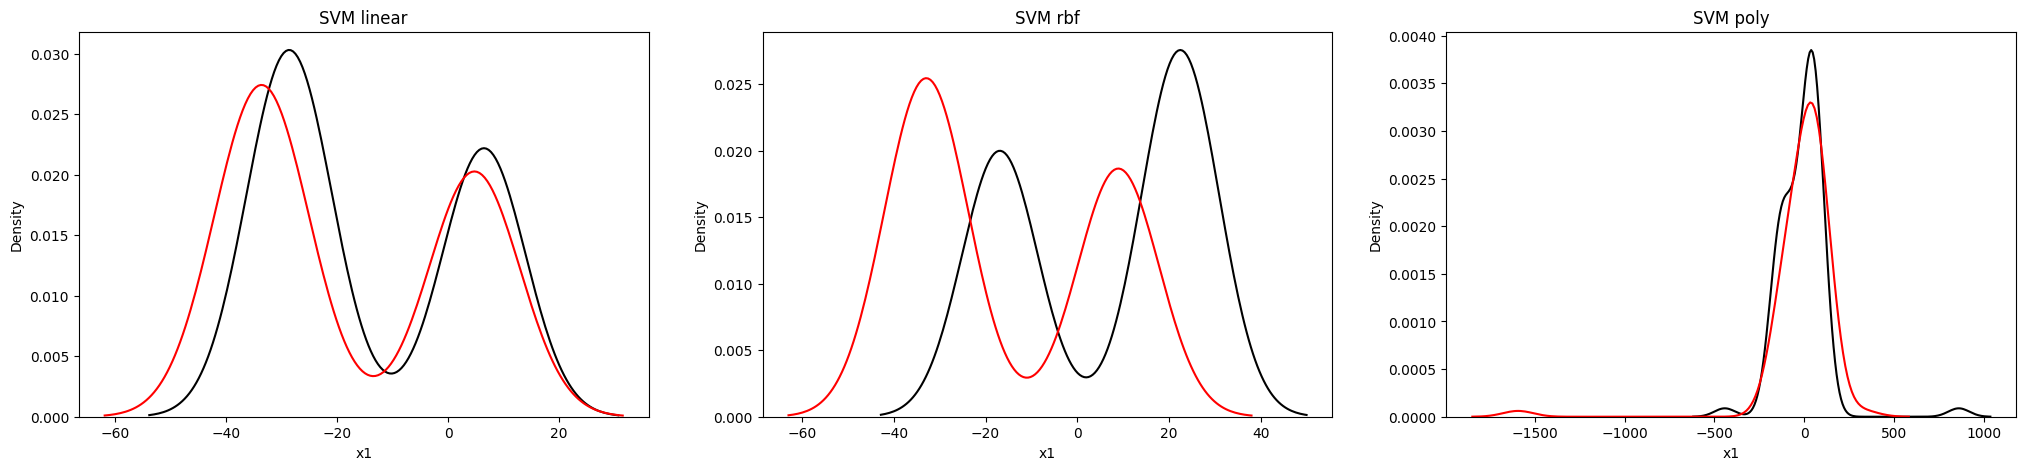

 _____  ____   _   _  _____   _  __ _   _  _   _ 
|_   _|/ ___| | \ | || ____| | |/ /| \ | || \ | |
  | |  \___ \ |  \| ||  _|   | ' / |  \| ||  \| |
  | |   ___) || |\  || |___  | . \ | |\  || |\  |
  |_|  |____/ |_| \_||_____| |_|\_\|_| \_||_| \_|
                                                 



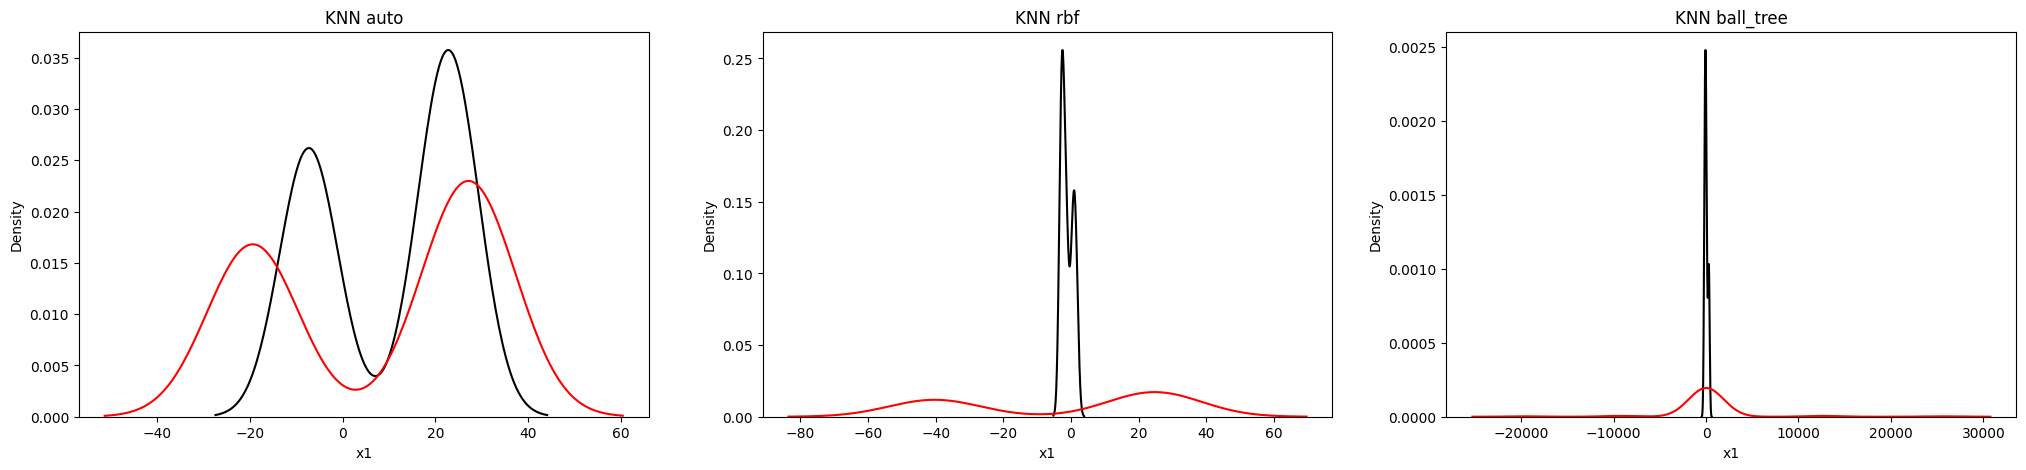

 _____  ____   _   _  _____   ____                     _                    _____                          _   
|_   _|/ ___| | \ | || ____| |  _ \   __ _  _ __    __| |  ___   _ __ ___  |  ___|  ___   _ __   ___  ___ | |_ 
  | |  \___ \ |  \| ||  _|   | |_) | / _` || '_ \  / _` | / _ \ | '_ ` _ \ | |_    / _ \ | '__| / _ \/ __|| __|
  | |   ___) || |\  || |___  |  _ < | (_| || | | || (_| || (_) || | | | | ||  _|  | (_) || |   |  __/\__ \| |_ 
  |_|  |____/ |_| \_||_____| |_| \_\ \__,_||_| |_| \__,_| \___/ |_| |_| |_||_|     \___/ |_|    \___||___/ \__|
                                                                                                               



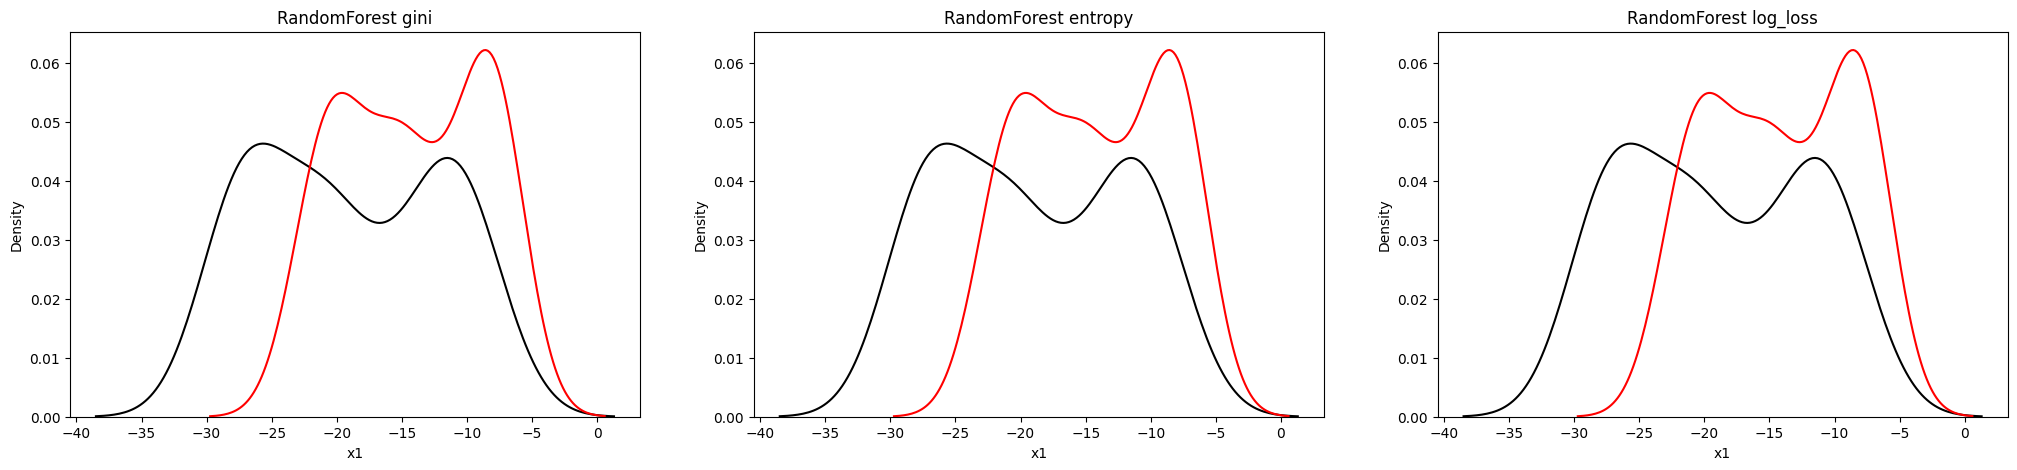

In [160]:


x_df1=pd.DataFrame(tsne_func(y_pred_SVM), columns=['x1','x2']) # y_pred_SVM_2
x_df2=pd.DataFrame(tsne_func(y_pred_SVM_2), columns=['x1','x2']) 
x_df3=pd.DataFrame(tsne_func(y_pred_SVM_3), columns=['x1','x2']) 
tprint("TSNE SVM")
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize =(25, 5)) #linear rbf poly
ax1.set_title('SVM linear')
ax2.set_title('SVM rbf')
ax3.set_title('SVM poly')

sns.kdeplot(x_df1['x1'], ax = ax1, color ='black')
sns.kdeplot(x_df1['x2'], ax = ax1, color ='red')

sns.kdeplot(x_df2['x1'], ax = ax2, color ='black')
sns.kdeplot(x_df2['x2'], ax = ax2, color ='red')

sns.kdeplot(x_df3['x1'], ax = ax3, color ='black')
sns.kdeplot(x_df3['x2'], ax = ax3, color ='red')

plt.show()


y_df1=pd.DataFrame(tsne_func(y_pred_KNN), columns=['x1','x2']) # y_pred_SVM_2
y_df2=pd.DataFrame(tsne_func(y_pred_KNN_2), columns=['x1','x2']) 
y_df3=pd.DataFrame(tsne_func(y_pred_KNN_3), columns=['x1','x2']) 
tprint("TSNE KNN")
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize =(25, 5)) #linear rbf poly
ax1.set_title('KNN auto') #'auto', 'ball_tree', 'kd_tree',
ax2.set_title('KNN rbf')
ax3.set_title('KNN ball_tree')

sns.kdeplot(y_df1['x1'], ax = ax1, color ='black')
sns.kdeplot(y_df1['x2'], ax = ax1, color ='red')

sns.kdeplot(y_df2['x1'], ax = ax2, color ='black')
sns.kdeplot(y_df2['x2'], ax = ax2, color ='red')

sns.kdeplot(y_df3['x1'], ax = ax3, color ='black')
sns.kdeplot(y_df3['x2'], ax = ax3, color ='red')

plt.show()



z_df1=pd.DataFrame(tsne_func(y_pred_RF), columns=['x1','x2']) # y_pred_SVM_2
z_df2=pd.DataFrame(tsne_func(y_pred_RF_3), columns=['x1','x2']) 
z_df3=pd.DataFrame(tsne_func(y_pred_RF_3), columns=['x1','x2']) 
tprint("TSNE RandomForest")
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize =(25, 5)) #linear rbf poly
ax1.set_title('RandomForest gini') # 'gini', 'entropy', 'log_loss'
ax2.set_title('RandomForest entropy')
ax3.set_title('RandomForest log_loss')

sns.kdeplot(z_df1['x1'], ax = ax1, color ='black')
sns.kdeplot(z_df1['x2'], ax = ax1, color ='red')

sns.kdeplot(z_df2['x1'], ax = ax2, color ='black')
sns.kdeplot(z_df2['x2'], ax = ax2, color ='red')

sns.kdeplot(z_df3['x1'], ax = ax3, color ='black')
sns.kdeplot(z_df3['x2'], ax = ax3, color ='red')

plt.show()



In [ ]:


x_df1=pd.DataFrame(tsne_func(y_pred_SVM), columns=['x1','x2']) # y_pred_SVM_2
x_df2=pd.DataFrame(tsne_func(y_pred_SVM_2), columns=['x1','x2']) 
x_df3=pd.DataFrame(tsne_func(y_pred_SVM_3), columns=['x1','x2']) 
tprint("UMAP SVM")
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize =(25, 5)) #linear rbf poly
ax1.set_title('SVM linear')
ax2.set_title('SVM rbf')
ax3.set_title('SVM poly')

sns.kdeplot(x_df1['x1'], ax = ax1, color ='black')
sns.kdeplot(x_df1['x2'], ax = ax1, color ='red')

sns.kdeplot(x_df2['x1'], ax = ax2, color ='black')
sns.kdeplot(x_df2['x2'], ax = ax2, color ='red')

sns.kdeplot(x_df3['x1'], ax = ax3, color ='black')
sns.kdeplot(x_df3['x2'], ax = ax3, color ='red')

plt.show()


y_df1=pd.DataFrame(tsne_func(y_pred_KNN), columns=['x1','x2']) # y_pred_SVM_2
y_df2=pd.DataFrame(tsne_func(y_pred_KNN_2), columns=['x1','x2']) 
y_df3=pd.DataFrame(tsne_func(y_pred_KNN_3), columns=['x1','x2']) 
tprint("UMAP KNN")
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize =(25, 5)) #linear rbf poly
ax1.set_title('KNN auto') #'auto', 'ball_tree', 'kd_tree',
ax2.set_title('KNN rbf')
ax3.set_title('KNN ball_tree')

sns.kdeplot(y_df1['x1'], ax = ax1, color ='black')
sns.kdeplot(y_df1['x2'], ax = ax1, color ='red')

sns.kdeplot(y_df2['x1'], ax = ax2, color ='black')
sns.kdeplot(y_df2['x2'], ax = ax2, color ='red')

sns.kdeplot(y_df3['x1'], ax = ax3, color ='black')
sns.kdeplot(y_df3['x2'], ax = ax3, color ='red')

plt.show()



z_df1=pd.DataFrame(tsne_func(y_pred_RF), columns=['x1','x2']) # y_pred_SVM_2
z_df2=pd.DataFrame(tsne_func(y_pred_RF_3), columns=['x1','x2']) 
z_df3=pd.DataFrame(tsne_func(y_pred_RF_3), columns=['x1','x2']) 
tprint("UMAP RandomForest")
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize =(25, 5)) #linear rbf poly
ax1.set_title('RandomForest gini') # 'gini', 'entropy', 'log_loss'
ax2.set_title('RandomForest entropy')
ax3.set_title('RandomForest log_loss')

sns.kdeplot(z_df1['x1'], ax = ax1, color ='black')
sns.kdeplot(z_df1['x2'], ax = ax1, color ='red')

sns.kdeplot(z_df2['x1'], ax = ax2, color ='black')
sns.kdeplot(z_df2['x2'], ax = ax2, color ='red')

sns.kdeplot(z_df3['x1'], ax = ax3, color ='black')
sns.kdeplot(z_df3['x2'], ax = ax3, color ='red')

plt.show()

